In [10]:
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)

In [16]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.11.0


In [11]:

import os
import shutil
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import image_dataset_from_directory

In [12]:
data_from_kaggle = "D:\\Nural Networks\\ece5831-2023- HW's\\Kaggle_Data\\train"
data_dirname = "D:\\Nural Networks\\ece5831-2023- HW's\\Dogs_vs_Cats"

In [13]:
def make_dataset(subset_name, start_idx, end_idx):
    for category in { "cat", "dog" }:
       # data_dirname/subset_name/categoroy 
       dir = f"{data_dirname}\\{subset_name}\\{category}"
       # print(dir)
       os.makedirs(dir)
       fnames = [f"{category}.{i}.jpg" for i in range(start_idx, end_idx)]
       # print(fnames)
       for fname in fnames:
                 
             
                 shutil.copyfile(src=f"{data_from_kaggle}\\{fname}", dst=f"{dir}\\{fname}")
           

In [15]:
make_dataset("train", 0, 3001)
make_dataset("validation", 7500, 8501)
# total: 12,500
make_dataset("test", 10000, 11001)

In [16]:
from tensorflow.keras import layers, models

def build_model():
    model = models.Sequential()

    # Input layer with Rescaling
    model.add(layers.InputLayer(input_shape=(200, 180, 3)))
    model.add(layers.Rescaling(1./255))

    # Convolutional layers with MaxPooling
    model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=2))

    # Flatten and Dense layer
    model.add(layers.Flatten())
    model.add(layers.Dense(1, activation="sigmoid"))

    return model


In [26]:
from dogs_cats import DogsCats

In [17]:
DogsCats = build_model()

In [18]:

DogsCats.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 200, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 198, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 41, 128)       7

In [19]:
DogsCats.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [20]:
batch_size = 32
train_dataset = image_dataset_from_directory(f"{data_dirname}/train", image_size=(200, 180), batch_size=batch_size)
validation_dataset = image_dataset_from_directory(f"{data_dirname}/validation", image_size=(200, 180), batch_size=batch_size)
test_dataset = image_dataset_from_directory(f"{data_dirname}/test", image_size=(200, 180), batch_size=batch_size)

Found 6002 files belonging to 2 classes.
Found 2002 files belonging to 2 classes.
Found 2002 files belonging to 2 classes.


In [21]:
DogsCats.fit(train_dataset, validation_data=validation_dataset, epochs=10)


Epoch 1/10


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
188/188 [==============================] - ETA: 0s - loss: 0.6924 - accuracy: 0.5253WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000257E173F558> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
188/188 [==============================] - 103s 542ms/step - loss: 0.6924 - accuracy: 0.5253 - val_loss: 0.6745 - val_accuracy: 0.5694
Epoch 2/10
188/1

In [53]:
## Augumentaion
data_augmentation = keras.Sequential( [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

In [55]:
data_augmentation = keras.Sequential( [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])



def aug_model():
    input = keras.Input(shape=(200, 180, 3))
    augmented_input = data_augmentation(input)


    x = layers.Rescaling(1./255)(augmented_input)
    x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
    x = layers.MaxPooling2D(pool_size=2)(x)
    x = layers.Flatten()(x)
    outputs = layers.Dense(1, activation="sigmoid")(x)

    model = keras.Model(inputs=input, outputs=outputs)
    return model

In [62]:
tf.autograph.set_verbosity(0)

In [27]:
from dogs_cats_aug import DogsCatsAug

In [56]:
DogsCatsAug = aug_model()

In [57]:
DogsCatsAug.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 200, 180, 3)]     0         
                                                                 
 sequential_9 (Sequential)   (None, 200, 180, 3)       0         
                                                                 
 rescaling_4 (Rescaling)     (None, 200, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 198, 178, 32)      896       
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 99, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 97, 87, 64)        18496     
                                                           

In [58]:
DogsCatsAug.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [59]:
DogsCatsAug.fit(train_dataset, validation_data=validation_dataset, epochs=10)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


188/188 [==============================] - ETA: 0s - loss: 0.6918 - accuracy: 0.5287WARNING: AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x000002388BE3E168> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
188/188 [==============================] - 107s 556ms/step - loss: 0.6918 - accuracy: 0.5287 - val_loss: 0.6750 - val_accuracy: 0.6214
Epoch 2/10
188/188 [==============================] - 105s 560ms/step - loss: 0.6706 - accuracy: 0.5883 - val_loss: 0.6338 - val_accuracy: 0.6528
Epoch 3/10
188/188 [==============================] - 103s 547ms/step - loss: 0.6310 - accuracy: 0.6460 - val_loss: 0.6386 - val_accuracy: 0.6274
Epoch 4/10
188/188 [===============

In [60]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np


# Load your test data using an ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_dir = r"D:\Nural Networks\ece5831-2023- HW's\Dogs_vs_Cats\test"


Found 2002 images belonging to 2 classes.
63/63 [==============================] - 8s 127ms/step - loss: 1.2409 - accuracy: 0.5000
Evaluation Results for DogsCats:
Loss: 4.6474199295043945, Accuracy: 0.5

Evaluation Results for DogsCatsAug:
Loss: 1.2409172058105469, Accuracy: 0.5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 183ms/step


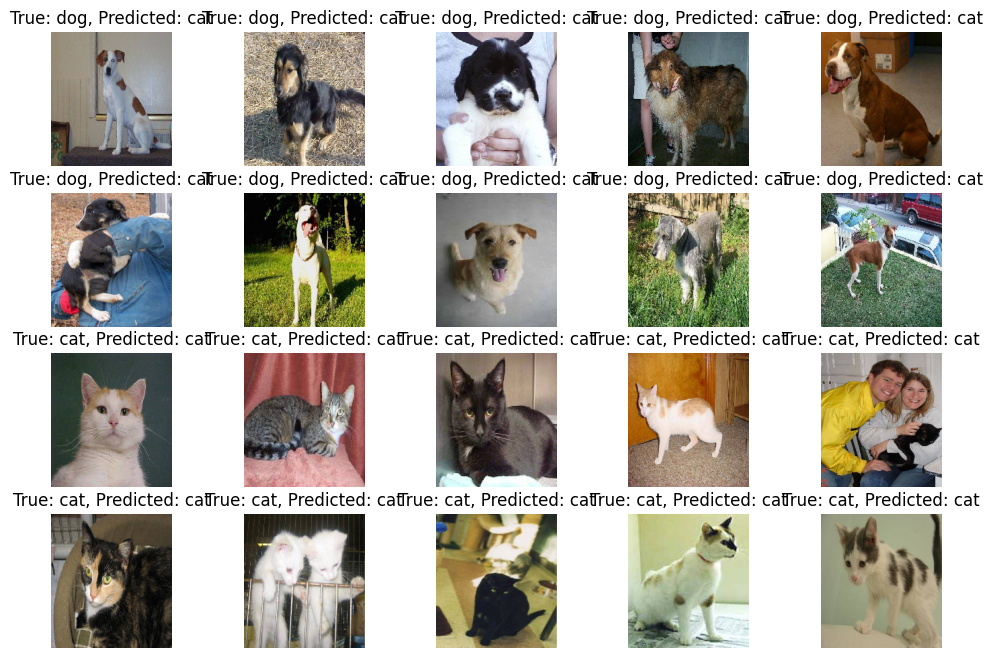

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
1/1 [==============================] - 0s 167ms/step


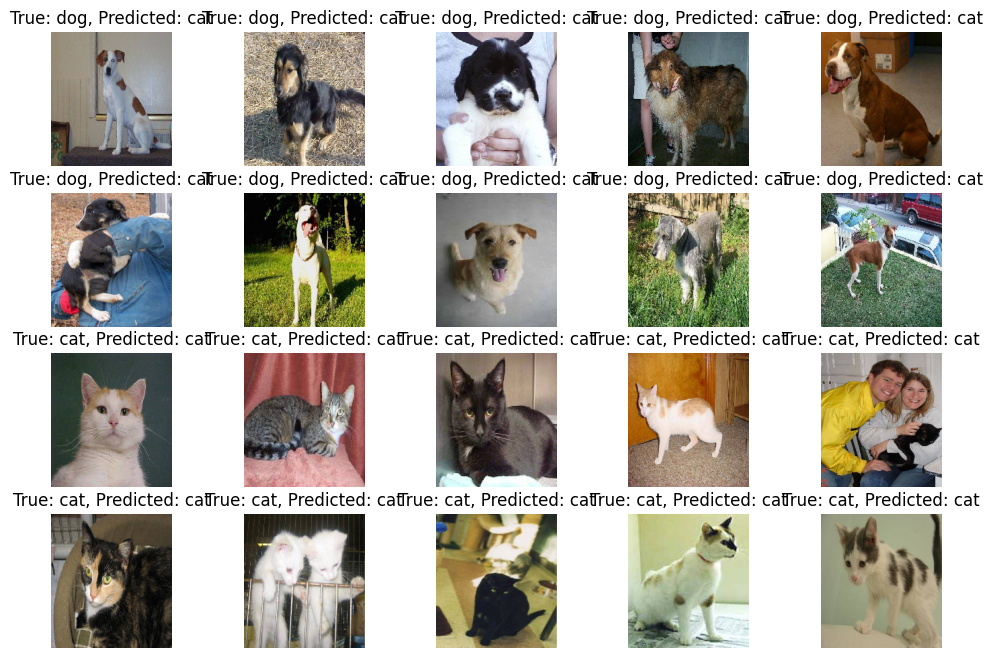

In [61]:

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(200, 180),
    batch_size=32,
    class_mode='binary'
)

# Evaluate model
evaluations_model = DogsCats.evaluate(test_generator)
evaluations_model1 = DogsCatsAug.evaluate(test_generator)

print("Evaluation Results for DogsCats:")
print(f"Loss: {evaluations_model[0]}, Accuracy: {evaluations_model[1]}")

print("\nEvaluation Results for DogsCatsAug:")
print(f"Loss: {evaluations_model1[0]}, Accuracy: {evaluations_model1[1]}")

# Visualize predictions for 10 images each from dogs and cats
class_names = ['cat', 'dog']

# Function to plot images with predictions
def plot_images_with_predictions(model, generator, class_names):
    num_dog_images = 0
    num_cat_images = 0
    i = 0
    plt.figure(figsize=(12, 8))
    
    while num_dog_images < 10 or num_cat_images < 10:
        img_batch, true_labels_batch = generator[i % len(generator)]
        
        # Get predictions for the batch
        predictions_batch = model.predict(img_batch)
        
        for j in range(img_batch.shape[0]):
            img = np.expand_dims(img_batch[j], axis=0)
            true_label = true_labels_batch[j]
            
            # Get prediction for the current image
            predicted_label = class_names[np.argmax(predictions_batch[j])]
            
            # Check if the image is a dog or cat and if the quota is not reached
            if true_label == 1 and num_dog_images < 10:
                num_dog_images += 1
                # Plot dog image
                plt.subplot(4, 5, num_dog_images)
                plt.imshow(img.squeeze())
                plt.title(f"True: {class_names[int(true_label)]}, Predicted: {predicted_label}")
                plt.axis('off')
            elif true_label == 0 and num_cat_images < 10:
                num_cat_images += 1
                # Plot cat image
                plt.subplot(4, 5, num_cat_images + 10)  # Start from the second row
                plt.imshow(img.squeeze())
                plt.title(f"True: {class_names[int(true_label)]}, Predicted: {predicted_label}")
                plt.axis('off')

            if num_dog_images >= 10 and num_cat_images >= 10:
                break
        
        i += 1

    plt.show()

# Plot images with predictions for model
plot_images_with_predictions(DogsCats, test_generator, class_names)

# Plot images with predictions for model1
plot_images_with_predictions(DogsCatsAug, test_generator, class_names)